<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Загрузим все необходимые для работы библиотеки

In [2]:
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             make_scorer)
                             
from sklearn.model_selection import (cross_val_score,
                                     train_test_split)

from sklearn.dummy import DummyRegressor

import numpy as np
import matplotlib.pyplot as plt

Откроем и изучим файлы

In [2]:
data_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
data_full.head(3)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [4]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [5]:
data_train.head(3)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [6]:
data_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [7]:
data_test.head(3)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.5,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.5,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.5,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

Вычислим эффективность обогащения на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [8]:
concentrate_au = data_train['rougher.output.concentrate_au']
feed_au = data_train['rougher.input.feed_au']
tail_au = data_train['rougher.output.tail_au']
output_recovery = data_train['rougher.output.recovery']
output_recovery_calc = (concentrate_au * (feed_au - tail_au) / feed_au 
                        / (concentrate_au - tail_au) * 100)

print('Абсолютная средняя ошибка =', mean_absolute_error(output_recovery, output_recovery_calc))

Абсолютная средняя ошибка = 1.0851689485498649e-14


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

Вывод: Средняя квадратичная ошибка стремится к 0. Расчеты проведены верно.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Сначала нужно проанализировать недостающие признаки в тесте, а потом присоединять, может, эти "столбики" там есть )).</font>

<font color='purple'><b> Переместила </b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

Проверим, каких столбиков нет в тестовой выборке

In [9]:
train_set = list(data_train.columns.values)
full_set = list(data_full.columns.values)
test_set = list(data_test.columns.values)

In [10]:
not_in_test = list(set(data_train)-set(data_test))
not_in_test

['rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'final.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag',
 'final.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.tail_sol',
 'rougher.output.concentrate_ag',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'primary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'final.output.recovery',
 'final.output.concentrate_sol',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'primary_cle

Вывод: в тестовой выборке отсутсвуют показатели, которые считаются после проведения этапов обработки руды.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

В дальнейшем, для проверки качества модели нам понадобятся некоторые столбики, которые отсутствуют в тестовой выборки. Добавим их

In [11]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться ко времени наблюдения.</font>

Выполним предобработку данных

Напишем функцию для просмотра общей информации по данным

In [12]:
def check(data):
    print('Описание:')
    print(data.describe())
    print()
    print(data.info())
    print()
    print('Дубликатов:')
    print(data.duplicated().sum())
    print()
    print('Пропусков:')
    display(pd.DataFrame(round(data.isna().mean()*100,)).style.\
background_gradient('coolwarm'))
    print()
    print(data.shape)

In [13]:
check(data_full)

Описание:
       rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
count           19439.000000           19439.000000           19339.000000   
mean                8.266097               8.794927               3.598085   
std                 1.955092               1.936847               1.049486   
min                 0.010000               0.010000               0.010000   
25%                 6.854384               7.237967               2.887280   
50%                 8.125839               8.593574               3.534895   
75%                 9.769917              10.213771               4.244161   
max                13.731330              14.596026               7.142594   

       rougher.input.feed_sol  rougher.input.feed_rate  \
count            19340.000000             19428.000000   
mean                36.695114               478.320042   
std                  5.145445               105.373758   
min                  0.010000                 0.002986 

,0
date,0.000000
rougher.input.feed_au,0.000000
rougher.input.feed_ag,0.000000
rougher.input.feed_pb,1.000000
rougher.input.feed_sol,1.000000
rougher.input.feed_rate,0.000000
rougher.input.feed_size,1.000000
rougher.input.floatbank10_sulfate,0.000000
rougher.input.floatbank10_xanthate,0.000000
rougher.state.floatbank10_a_air,0.000000



(19439, 87)


In [14]:
check(data_train)

Описание:
       rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
count           14579.000000           14579.000000           14507.000000   
mean                8.352941               8.877460               3.604221   
std                 1.934376               1.922536               1.056063   
min                 0.010000               0.010000               0.010000   
25%                 6.932996               7.341922               2.880490   
50%                 8.225284               8.715859               3.532399   
75%                 9.832210              10.255843               4.257282   
max                13.731330              14.596026               7.052325   

       rougher.input.feed_sol  rougher.input.feed_rate  \
count            14502.000000             14572.000000   
mean                36.561420               474.332784   
std                  5.209823               108.503552   
min                  0.010000                 0.002986 

,0
date,0.000000
rougher.input.feed_au,0.000000
rougher.input.feed_ag,0.000000
rougher.input.feed_pb,0.000000
rougher.input.feed_sol,1.000000
rougher.input.feed_rate,0.000000
rougher.input.feed_size,1.000000
rougher.input.floatbank10_sulfate,0.000000
rougher.input.floatbank10_xanthate,0.000000
rougher.state.floatbank10_a_air,0.000000



(14579, 87)


In [15]:
check(data_test)

Описание:
       rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
count            4860.000000            4860.000000            4832.000000   
mean                8.005584               8.547348               3.579662   
std                 1.993590               1.958601               1.029377   
min                 0.010000               0.010000               0.010000   
25%                 6.574363               6.975898               2.903612   
50%                 7.812923               8.179714               3.540772   
75%                 9.556589              10.084339               4.199847   
max                13.417156              14.533698               7.142594   

       rougher.input.feed_sol  rougher.input.feed_rate  \
count             4838.000000              4856.000000   
mean                37.095864               490.285103   
std                  4.926284                94.371623   
min                  0.010000                 0.012786 

,0
date,0.000000
rougher.input.feed_au,0.000000
rougher.input.feed_ag,0.000000
rougher.input.feed_pb,1.000000
rougher.input.feed_sol,0.000000
rougher.input.feed_rate,0.000000
rougher.input.feed_size,1.000000
rougher.input.floatbank10_sulfate,0.000000
rougher.input.floatbank10_xanthate,0.000000
rougher.state.floatbank10_a_air,0.000000



(4860, 55)


В данных есть небольшой процент пропусков. Заполним их значениями за предыдущую дату.

In [16]:
clean_data_train = data_train.fillna(method='ffill')

In [17]:
clean_data_test = data_test.fillna(method='ffill')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Лучше использовать `ffill`, при работе пропуски заполнят предыдущимм значением, а не будущим.</font>

<font color='purple'><b>Исправила на ffil. Что-то я запуталась. Я и думала, что bfil - это предыдущее.</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Сортировка идёт от раннего к позднему и заполнение "вперёд"(forward)- это более ранее значение на место пропуска, "назад" (backward) - более позднее.</font>

Напишем функцию для проверки распределения металлов на разных этапах

In [18]:
def make_hist(name, step_1, step_2, step_3, step_4):
    step_1.plot(title = name, 
                kind='hist',
                label='Input feed',
                alpha=0.5,
                grid=True, 
                bins=100,
                legend=True,
                figsize=(13, 6));
    step_2.plot(kind='hist',
                label='Roughter output',
                alpha=0.5,
                grid=True,
                legend=True,
                bins=100);
    step_3.plot(kind='hist',
                label='Cleaner output',
                alpha=0.5,
                grid=True, 
                bins=100,
                legend=True);
    step_4.plot(kind='hist',
                label='Final output',
                alpha=0.5,
                grid=True, 
                bins=100,
                legend=True);

Посмотрим распределение золота на обуающей выборке 

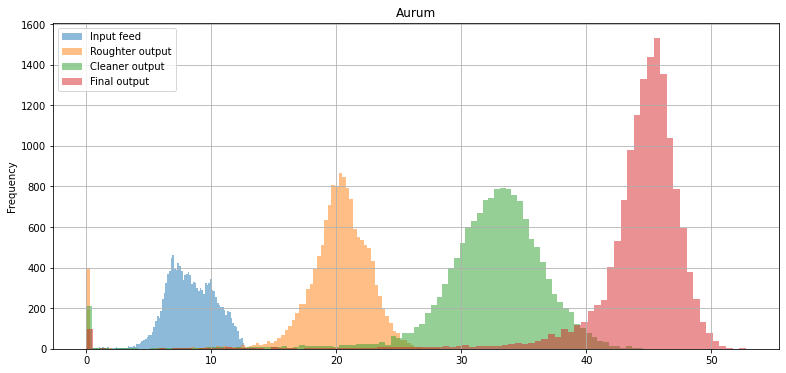

In [19]:
make_hist('Aurum', 
          clean_data_train['rougher.input.feed_au'],
          clean_data_train['rougher.output.concentrate_au'],
          clean_data_train['primary_cleaner.output.concentrate_au'],
          clean_data_train['final.output.concentrate_au'])

Распределение нормальное, но мы видим всплеск возле 0 на всех этапах. Я считаю - это выбросы и их следует удалить.

In [20]:
clean_data_train = clean_data_train[clean_data_train['rougher.output.concentrate_au'] > 5]
clean_data_train = clean_data_train[clean_data_train['primary_cleaner.output.concentrate_au'] > 5]
clean_data_train = clean_data_train[clean_data_train['final.output.concentrate_au'] > 5]

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

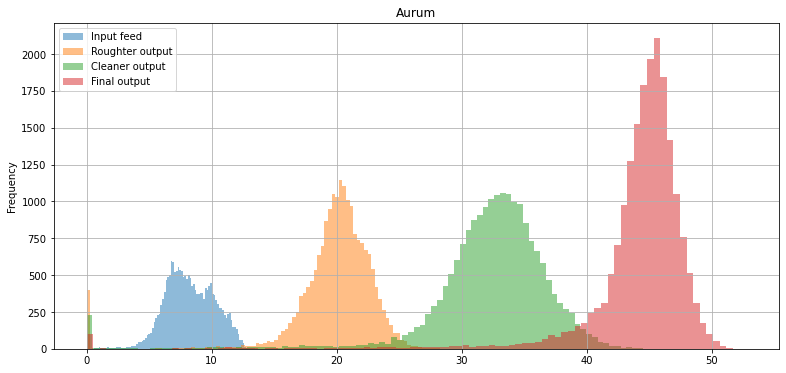

In [21]:
make_hist('Aurum', 
          data_full['rougher.input.feed_au'],
          data_full['rougher.output.concentrate_au'],
          data_full['primary_cleaner.output.concentrate_au'],
          data_full['final.output.concentrate_au'])

Концетрация золота увеличивается с каждым этапом.

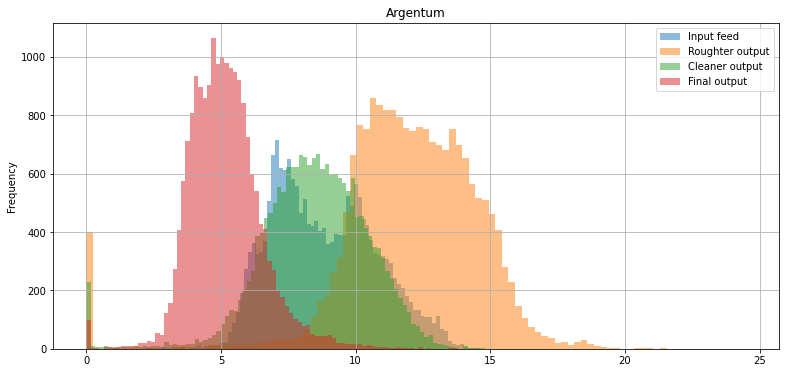

In [22]:
make_hist('Argentum', 
          data_full['rougher.input.feed_ag'],
          data_full['rougher.output.concentrate_ag'],
          data_full['primary_cleaner.output.concentrate_ag'],
          data_full['final.output.concentrate_ag'])

<font color='purple'><b>Концентрация серебра падает. </b></font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Где концентрация серебра выше: в начале или в финале процесса? </s></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Ну, не с каждым - в начале концентрация растёт, но, в целом, да, коцентрация уменьшается раза в два.</font>

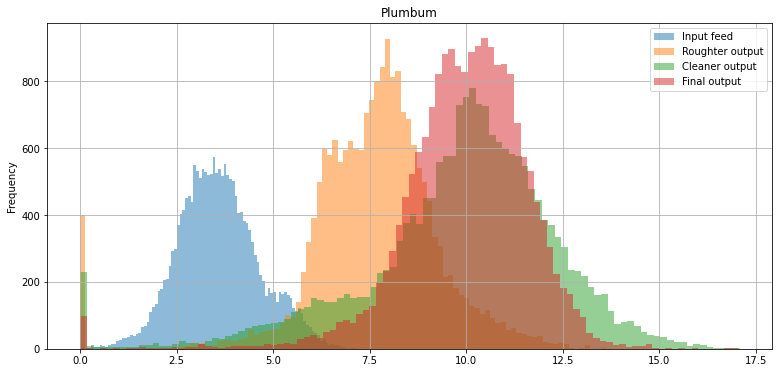

In [23]:
make_hist('Plumbum', 
          data_full['rougher.input.feed_pb'],
          data_full['rougher.output.concentrate_pb'],
          data_full['primary_cleaner.output.concentrate_pb'],
          data_full['final.output.concentrate_pb'])

Концентрация свинца увеличивалась, но не так явно как золота.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

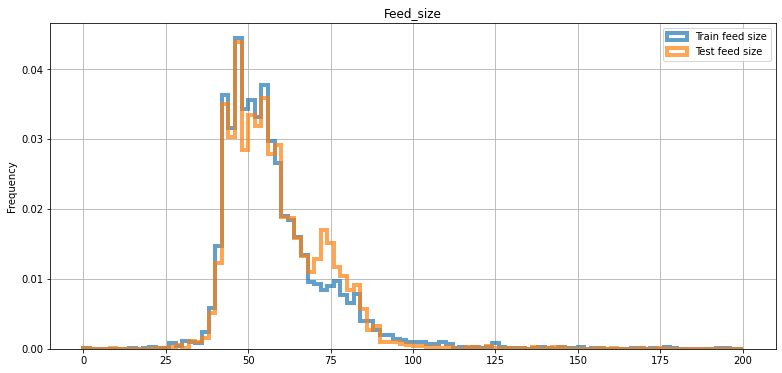

In [24]:
clean_data_train['rougher.input.feed_size'].plot(title = 'Feed_size', 
                kind='hist',
                histtype='step',
                label='Train feed size',
                alpha=0.7,
                grid=True, 
                range=(0, 200),
                density=True,                                 
                linewidth=4,                                 
                bins=100,
                legend=True,
                figsize=(13, 6));
clean_data_test['rougher.input.feed_size'].plot(title = 'Feed_size', 
                kind='hist',
                histtype='step',
                label='Test feed size',
                alpha=0.7,
                grid=True,
                range=(0, 200),
                density=True,
                linewidth=4,
                bins=100,
                legend=True,
                figsize=(13, 6));

Распределения похожи

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Вывод верный!</font> \
<font color='red'><s> В данном случае нужно использовать параметр "density=True". Так бы нам удалось перейти от количества к доле.</s></font>

 <font color='purple'><b> Спасибо, добавила. </b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Супер! Выборки разного размера, нужна нормализация по плотности 👍</font>

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [25]:
def metal_sum(au, ag, pb, sol):
    step_sum = au + ag + pb + sol
    return step_sum

In [26]:
input_feed_sum = metal_sum(data_full['rougher.input.feed_au'],
                           data_full['rougher.input.feed_ag'],
                           data_full['rougher.input.feed_pb'], 
                           data_full['rougher.input.feed_sol'])
rougher_sum = metal_sum(data_full['rougher.output.concentrate_au'],
                        data_full['rougher.output.concentrate_ag'],
                        data_full['rougher.output.concentrate_pb'], 
                        data_full['rougher.output.concentrate_sol'])
cleaner_sum = metal_sum(data_full['primary_cleaner.output.concentrate_au'],
                        data_full['primary_cleaner.output.concentrate_ag'],
                        data_full['primary_cleaner.output.concentrate_pb'], 
                        data_full['primary_cleaner.output.concentrate_sol'])
final_sum = metal_sum(data_full['final.output.concentrate_au'],
                      data_full['final.output.concentrate_ag'],
                      data_full['final.output.concentrate_pb'],
                      data_full['final.output.concentrate_sol'])

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Нужно ещё _sol добавить. Что была сумма *всех веществ* .</font>

 <font color='purple'><b> Добавила. Просто в задании в пункте 2.1 было сказано про металлы Au, Ag, Pb, я и подумала, что в пункте 2.3 про те же металлы идет речь. А что такое sol? </b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Коллоид (посмотри золь в химии), на английском он как раз sol.\
Поскольку это вещество специально добавляют, можно судить о аномальности низких суммарных концентраций, и можно предположить сбой измерительного оборудования.</font>

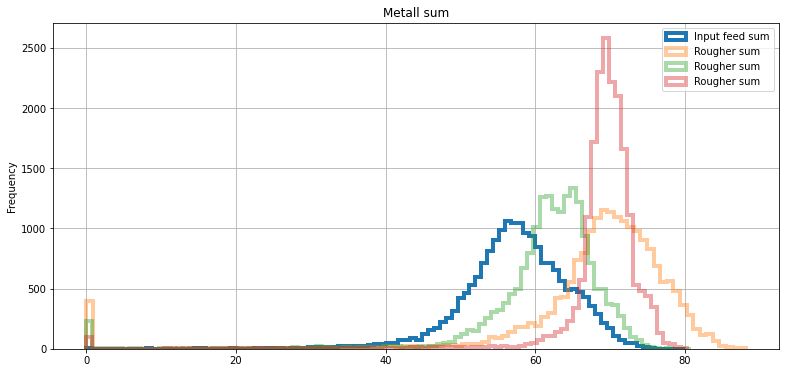

In [27]:
input_feed_sum.plot(title = 'Metall sum', 
                    kind='hist',
                    histtype='step',
                    label='Input feed sum',
                    alpha=1,
                    grid=True, 
                    range=(0, 80),
                    linewidth=4,                                 
                    bins=100,
                    legend=True,
                    figsize=(13, 6));
rougher_sum.plot(kind='hist',
                 histtype='step',
                 label='Rougher sum',
                 alpha=0.4,
                 grid=True,
                 linewidth=4,                                 
                 bins=100,
                 legend=True);
cleaner_sum.plot(kind='hist',
                 histtype='step',
                 label='Rougher sum',
                 alpha=0.4,
                 grid=True,
                 linewidth=4,                                 
                 bins=100,
                 legend=True);
final_sum.plot(kind='hist',
               histtype='step',
               label='Rougher sum',
               alpha=0.4,
               grid=True,
               linewidth=4,                                 
               bins=100,
               legend=True);

Суммарная концентрация металлов возрастает

Общий вывод: Распределение концентрации металлов нормальное, с каждым этапом возрастает, особенно золота. Это ожидаемо, ведь мы исследуем процесс получения золота из руды.

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Обрати внимание на нулевые и около нулевые значения концентраций. Это явная ошибка. Скорее всего это связано со сбоем измерительного оборудования. Такие наблюдения нужно удалить из **обучающих** данных.\
Модель планируется использовать для подбора параметров оборудования, поэтому примеры со сбоями не интересные для моделирования.</s></font>

<font color='purple'><b> Во второй части мы смотрим полные данные. А в обучабщих данных я нули удалила на этапе предобработки. Этого достаточно же? </b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Отсутствие только золота может быть пустой рудой, достоверными выбросами можно считать только нулевые значения суммарных концентраций, поскольку они объяснимы.</font>

## Модель

Подготовим данные к обучению и тесту. Посмотрим размеры обучающей и тестовой выборок.

In [28]:
clean_data_train.shape

(13850, 87)

In [29]:
clean_data_test.shape

(4860, 55)

В тестовой выборке нет некоторых столбцов, удалим их и из обучающей выборки, кроме целевых.

In [30]:
not_in_test.remove('rougher.output.recovery')
not_in_test.remove('final.output.recovery')

In [31]:
data_train_ml = clean_data_train.drop(not_in_test, axis = 1)

In [32]:
data_train_ml.shape

(13850, 55)

In [33]:
clean_data_test.shape

(4860, 55)

Напишем функицб для скорер sMAPE

In [34]:
def smape( target, pred):
    smape = (abs(target-pred)/((abs(target)+abs(pred))/2)*100).mean()
    return smape

In [35]:
def total_smape(rougher_smape, final_smape):
    total_smape = 0.25 * rougher_smape + 0.75 * final_smape
    return total_smape

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` и `total_smape` расчитаны верно.</font>

Запишем features и target для обучающей и тестовой выборок

In [36]:
features_train = data_train_ml.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = data_train_ml['rougher.output.recovery']
target_train_final = data_train_ml['final.output.recovery']
features_test = clean_data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = clean_data_test['rougher.output.recovery']
target_test_final = clean_data_test['final.output.recovery']

Обучим разыне модели, проверим разные параметры кросс-валидацией, подберем наилучшую для Rougher и Final этапов

Проверим модель Дерево решений для Rougher этапа

In [37]:
%%time
best_score = 20
best_depth = 0
for depth in range(1, 10, 1):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    score = make_scorer(smape)
    scores = cross_val_score(model, features_train, target_train_rougher, cv=5, scoring=score) 
    final_score = abs(scores.mean())
    if final_score < best_score:
        best_score = final_score
        best_depth = depth
print('Средняя оценка качества модели:', best_score, 'depth', best_depth)

Средняя оценка качества модели: 6.711509653467597 depth 4
CPU times: user 11.6 s, sys: 36.3 ms, total: 11.6 s
Wall time: 11.6 s


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Атрибут greater_is_better=False нужен для алгоритмов *SearchCV, которые по умолчанию ищют наибольшую метрику. Поскольку здесь мы сами задаём условие отбора лучшей модели, этот атрибут можно не использовать, что бы не было путанницы с отрицательными значениями метрики.</font>

<font color='purple'><b> Убрала. Я вообще запуталась, когда гуглила про этот SearchCV, поэтому не стала использовать. А где мы это в обучении проходили, я не нашла. </b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> В курсе этого нет, но это полезные инструменты для автоматического поиска гиперпараметров. ПРигодятся в будущих работах.\
[GridSearchCV](https://russianblogs.com/article/44371250346/)

Проверим моедль Случайный лес для Rougher этапа

In [38]:
%%time
best_est = 0
best_depth = 0
best_score = 20 

for est in range (1, 50, 5):
    for depth in range (1, 5, 1):
        
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        score = make_scorer(smape)
        scores = cross_val_score(model, features_train, target_train_rougher, cv=5, scoring=score) 
        final_score = abs(scores.mean())
        if final_score < best_score:
            best_score = final_score
            best_depth = depth
            best_est = est
        
        
print('Средняя оценка качества модели:', best_score, 'depth', best_depth, 'est', best_est)

Средняя оценка качества модели: 6.356328265683976 depth 4 est 41
CPU times: user 6min 26s, sys: 903 ms, total: 6min 27s
Wall time: 6min 28s


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проверим модель Линейная регрессия для Rougher этапа

In [39]:
model = LinearRegression()
score = make_scorer(smape)
scores = cross_val_score(model, features_train, target_train_rougher, cv=5, scoring=score) 
final_score = abs(scores.mean())
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 7.144211801736094


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что оценка по sMAPE!</font>

Для Rougher этапа лучшей моделью оказался:

Случайный лес 

depth = 4

estimators = 41

Запомним smape для Rougher этапа тестовой выборки

In [54]:
rougher_smape_train = 6.356328265683976

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проверим модель Дерево решений для Final этапа

In [41]:
%%time
best_score = 20
best_depth = 0
for depth in range(1, 10, 1):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    score = make_scorer(smape)
    scores = cross_val_score(model, features_train, target_train_final, cv=5, scoring=score) 
    final_score = abs(scores.mean())
    if final_score < best_score:
        best_score = final_score
        best_depth = depth
print('Средняя оценка качества модели:', best_score, 'depth', best_depth)

Средняя оценка качества модели: 8.8710531151866 depth 2
CPU times: user 11.2 s, sys: 15.9 ms, total: 11.2 s
Wall time: 11.3 s


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проверим модель Случайный лес для Final этапа

In [42]:
%%time
best_est = 0
best_depth = 0
best_score = 20 

for est in range (1, 15, 1):
    for depth in range (1, 5, 1):
        
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        score = make_scorer(smape)
        scores = cross_val_score(model, features_train, target_train_final, cv=5, scoring=score) 
        final_score = abs(scores.mean())
        if final_score < best_score:
            best_score = final_score
            best_depth = depth
            best_est = est
           
        
print('Средняя оценка качества модели:', best_score, 'depth', best_depth, 'est', best_est)

Средняя оценка качества модели: 8.647203112494307 depth 2 est 7
CPU times: user 2min 50s, sys: 461 ms, total: 2min 50s
Wall time: 2min 51s


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проверим модель Линейная регрессия для Final этапа

In [43]:
model = LinearRegression()
score = make_scorer(smape)
scores = cross_val_score(model, features_train, target_train_final, cv=5, scoring=score) 
final_score = abs(scores.mean())
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 9.421787953877928


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Для Final этапа лучшей моделью оказался:

Случайный лес 

depth = 2

estimators = 7

Запомним smape для Final этапа тестовой выборки

In [55]:
final_smape_train = 8.647203112494307

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [56]:
total_smape_train = total_smape(rougher_smape_train, final_smape_train)

In [57]:
print(f'rougher sMAPE на тренировочной выборке {rougher_smape_train}')
print(f'final sMAPE на тренировочной выборке {final_smape_train}')
print(f'total sMAPE на тренировочной выборке {total_smape_train}')

rougher sMAPE на тренировочной выборке 6.356328265683976
final sMAPE на тренировочной выборке 8.647203112494307
total sMAPE на тренировочной выборке 8.074484400791723


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проверим лучшую модель на тестовой выборке

In [47]:
def best_model(features_train, target_train, features_test, target_test, depth, est):
    
    model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
    model.fit(features_train, target_train)
    test_predict = model.predict(features_test)
    final_score = smape(target_test, test_predict)
    return final_score

In [48]:
rougher_smape_test = best_model(features_train, target_train_rougher, features_test, target_test_rougher, 4, 41)

In [58]:
final_smape_test = best_model(features_train, target_train_final, features_test, target_test_final, 2, 7)
total_smape_test = total_smape(rougher_smape_test, final_smape_test)

In [59]:
print(f'rougher sMAPE на тестовой выборке {rougher_smape_test}')
print(f'final sMAPE на тестовой выборке {final_smape_test}')
print(f'total sMAPE на тестовой выборке {total_smape_test}')

rougher sMAPE на тестовой выборке 4.090961097287984
final sMAPE на тестовой выборке 8.53708761279562
total sMAPE на тестовой выборке 7.425555983918711


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Нужно сравнить с константной моделью, например с `DummyRegressor`, из одного значения метрики не ясно насколько адекватно предсказание моделей. )</s></font>

<font color='purple'><b> Я хотела, но в обучении было про константную модель только на задаче классификации. Я не смогла нагуглить информацию, как это сделать для регрессии. Сейчас попробую. </b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Можно заполнить предикт средней обучающих таргетов длинной с тестовые данные методами Pandas, но в sklearn есть удобная псевдо модель с привычным интерфейсом с разными стратегиями заполнения )) 👍 </font>

In [60]:
def constant_test(features_train, target_train, features_test, target_test):
    dummy_regr = DummyRegressor(strategy="mean")
    dummy_regr.fit(features_train, target_train)
    test_predict = dummy_regr.predict(features_test)
    final_score = smape(target_test, test_predict)
    return final_score

In [61]:
rougher_smape_test_const = constant_test(features_train, target_train_rougher, features_test, target_test_rougher)
final_smape_test_const = constant_test(features_train, target_train_final, features_test, target_test_final)
total_smape_test_const = total_smape(rougher_smape_test_const, final_smape_test_const)

In [62]:
print(f'rougher sMAPE на константной выборке {rougher_smape_test_const}')
print(f'final sMAPE на тестовой выборке {final_smape_test_const}')
print(f'total sMAPE на тестовой выборке {total_smape_test_const}')

rougher sMAPE на константной выборке 6.094753468638436
final sMAPE на тестовой выборке 9.257293647531315
total sMAPE на тестовой выборке 8.466658602808096


sMAPE на константной выборке выше, чем на тестовой. Можель можно считать адекватной.

Перед нами стояла задача подготовки прототипа модели машинного обучения по предсказанию коэфициента восстановления золота из золотосодержащей руды. Для того, чтобы подготовить прототип, мы провели следующие этапы работы:
1) загрузили и ознакомились с данными

2) проверили, что эффективность обогазения рассчитана верно

3) Добавили недостающие целевые столбики втестовую выборку для оценки качества модели

4) Увидели, что показателей, которые считаются после проведения этапов флотации и очистки, не хватает в тестовой выборке

5) Заменили пропуски ближайщими значениями

6) Избавились от небольшого количества нудевых значений, которые могл помешать обучению.

7) Увидели, что концентрация металлов возрастает на каждом этапе

8) Увидели, что распределение размеров гранул на обучающей и тестовой выборках совпадают.

9) Увидели, что суммарная концентрация металлов возрастает на каждом этапе

10) Обучили несколько моделей, подобрали наилучшие параметры и оценили качество с помощью валидации и метрики sMape для Rougher и Final этапов.

Лучшая модель и парметры для Rougher этапа:

Случайный лес 

depth = 4

estimators = 41

учшая модель и парметры для Final этапа:

Случайный лес 

depth = 2

estimators = 6

rougher sMAPE на тренировочной выборке 6.353403313266012

final sMAPE на тренировочной выборке 8.642113350678812

total sMAPE на тренировочной выборке 8.069935841325613

rougher sMAPE на тестовой выборке 4.047971152088125

final sMAPE на тестовой выборке 8.530416432843461

total sMAPE на тестовой выборке 7.409805112654627

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Яна, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Поправь вывод по изменению концентрации серебра.</font></ul>
<ul><font color='red'>Нормализуй гистограммы для сравнения расперделений размеров гранул.</font></ul>
<ul><font color='red'>Попробуй обучить модели на данных очищенных от ошибочных измерений.</font></ul>
<ul><font color='red'>Добавь тест константной модели для оценки адекватности работы моделей.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='darkorange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Яна, проект принят! \
Все этапы пройдены. Все критичные рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке